# Projeto Spotify Wrapped 

Recentemente venho estudando a área de Data Science, Data Analytics e as várias derivações de inteligência artificial, e descobri um grande interesse por esse mundo. Foi então que decidi inicia pequeno projeto onde eu possa praticar meus conhecimentos aprendidos, e também mostrar como o nosso cotidiano está repleto de tecnologia aplicada sobre inteligência artificial.

O que iremos aprender:
- Extração
- Exploração
- Limpeza
- Agregação
- Storytelling

### O que é spotify wrapped
Hoje, venho mostrar um projeto utilizando a plataforma de streaming de música mais utilizada no mundo, o Spotify. Iremos criar um recorço semelhante ao que o Spotify disponibiliza, chamada "Spotify Wrapped", que nada mais é do que uma retrospectiva das músicas, artistas entro outros, mais ouvidos durante o seu ano.

<img src="images/2022-05-19 19_20_48-Window.png" alt="drawing" width="600"/>

### DataSet
Nesse projeto irei utilizar o meu DataSet pessoal de meu perfil do Spotify. Para conseguir as suas informações pessoais, basta ir nas [Configurações de Privacidade](https://www.spotify.com/br/account/privacy/) da sua conta, e no final da página, seguir os passos para solicitação de seus dados. Dentro de alguns dias, você recebera por e-mail a confinação para baixas seus dados.

<img src="images/2022-05-19 19_21_51-Window.png" alt="drawing" width="900"/>


## Exploratory Data Analysis (EDA)
O que faremos hoje, será trabalha com um conceito primordial para o papel de um analista de dados, a análise Exploratória de dados(EAD).
- A EAD é um processo de analisar e resumir de forma detalhada um DataSet ou conjunto de dados. O objetivo é por várias técnicas, extrair informações precisas e claras, para a extração de _insights_.


Antes de começar a analisar, importaremos as bibliotecas que iremos utilizar, e também carregar nosso dataset.

 Como padrão, o spotify disponibiliza todas as informações em formato JSON, como observamos no exemplo abaixo:

In [75]:
{
  "endTime" : "2021-04-29 03:33",
  "artistName" : "Tame Impala",
  "trackName" : "Let It Happen",
  "msPlayed" : 345700
}

{'endTime': '2021-04-29 03:33',
 'artistName': 'Tame Impala',
 'trackName': 'Let It Happen',
 'msPlayed': 345700}

### Como índices temos:
-  endTime - Data e hora em que o fluxo terminou no formato UTC (Fuso Horário Universal Coordenado).
-  artistName - Nome do "criador" para cada fluxo (por exemplo, o nome do artista se for uma faixa de música).
-  trackName - Nome dos itens ouvidos ou assistidos (por exemplo, título da faixa de música ou nome do vídeo).
-  msPlayed - “msPlayed”- Representa quantos milissegundos a faixa foi ouvida pelo usuário.

# Extração


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

dataframe0 = pd.read_json('./data-frame/StreamingHistory0.json')
dataframe1 = pd.read_json('./data-frame/StreamingHistory1.json')
dataframe2 = pd.read_json('./data-frame/StreamingHistory2.json')
print(f"dataframe0: {dataframe0.shape}\ndataframe1: {dataframe1.shape}\ndataframe2: {dataframe2.shape}")

dataframe0: (10000, 4)
dataframe1: (10000, 4)
dataframe2: (7154, 4)


Como quero fazer uma análise completa, irei concatenar dos dataframes, transformando-os apenas em um.

In [77]:
sptf = pd.concat([dataframe0,dataframe1,dataframe2], ignore_index=True)
print(f"Novo DataFrame: {sptf.shape}")

Novo DataFrame: (27154, 4)


Como podemos ver, foi concatenado os 3 dataframes, somando um total de 27154 linhas, e 4 colunas.

O que faremos agora, é olhar para os dados que temos, e explorar essas informações que temos.
# Exploração

In [78]:
sptf.head()

,endTime,artistName,trackName,msPlayed
0,2021-04-29 03:33,Tame Impala,Let It Happen,345700
1,2021-04-30 12:08,Tame Impala,The Less I Know The Better,216320
2,2021-04-30 12:35,Tame Impala,Borderline,146885
3,2021-04-30 18:25,Mc Mr. Bim,Eu Que Sabotei,4820
4,2021-04-30 18:25,Tame Impala,Borderline,292290


In [79]:
sptf.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

In [80]:
sptf.dtypes

endTime       object
artistName    object
trackName     object
msPlayed       int64
dtype: object

Nas colunas que são _object_ podemos pressupor serem textos, e na coluna que é _int64_ um número inteiro.
- Estatísticas descritivas.

Para termos uma visão mais panorâmica do nosso DataSet podemos utilizar o comando describe(). Com ele conseguimos extrair as informações básicas como quantidade, média, minha e máxima, alguns percentuais e std. Esse comando visa, gerar estatísticas descritivas de nosso DataSet. Também pode ser aplicado individualmente com apenas uma coluna.

Como ha apenas o msPlayer como um valor numérico, todos esses cálculos serão feitos apenas pobre ele.

In [81]:
sptf.describe()

,msPlayed
count,2.715400e+04
mean,1.382141e+05
std,1.276086e+05
min,0.000000e+00
25%,1.397000e+04
50%,1.559640e+05
75%,1.997010e+05
max,1.088158e+07


In [82]:
sptf.min()

endTime                        2021-04-29 03:33
artistName                      #TeuFuturo Cast
trackName      Som de chuva - dormir, relaxar  
msPlayed                                      0
dtype: object

Como podemos notar acima, o valor mínimo de msPlayed é 0(Zero), então vamos verificar se essas informações estão corretas.

In [83]:
msPlayed_zero = sptf.query('msPlayed <= 0')
msPlayed_zero.head(10)

,endTime,artistName,trackName,msPlayed
18,2021-05-02 22:49,Mc Livinho,Ela é Espetacular (Mulher Kama Sutra 2),0
19,2021-05-02 22:49,Mc Don Juan,Preta do Cabelo Cacheado,0
20,2021-05-02 22:49,Malu,Disco Arranhado - Funk Remix,0
225,2021-05-09 00:07,2STRANGE,Quantas Vezes?,0
341,2021-05-09 04:58,Deejay Lucca,Vai no Chão Com o Rabetão,0
423,2021-05-09 08:01,Rilès,I LOVE YOU,0
1170,2021-05-23 00:28,Vitão,Edredom,0
1171,2021-05-23 00:28,Costa Gold,Copo Roxo,0
1175,2021-05-23 00:28,ResenhaDaBlakk,Não Tem Mais Nós Dois,0
1176,2021-05-23 00:28,Haikaiss,Má-Temática,0


Após uma pequena análise, podemos notar que as músicas que tem o valor 0(zero), são musicas que não tiveram o seu tempo escutado contabilizado. Com isso, caso seja feita alguma análise mais complexa futuramente, esses valores podem ser considerados _outliers_.

O que são _outliers_:
São valores que os diferencia drasticamente de todos os outros, ou que fogem do padrão dos valores, podendo causar anomalias nos resultados de algoritmos mais complexos, como uma Regressão Linear.

Vejamos isso em um grafico scatter em um  diagrama de caixa:

scatter:


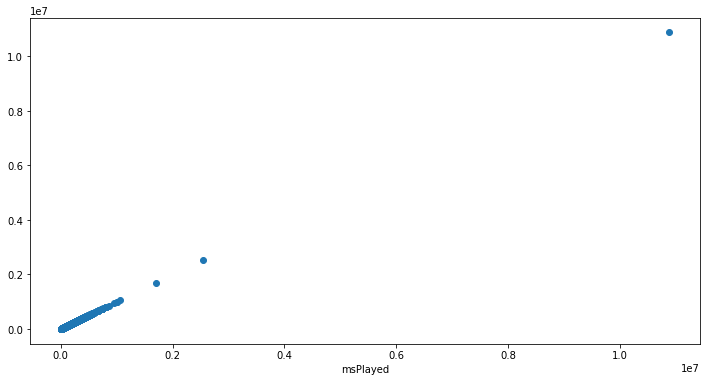

boxplot:


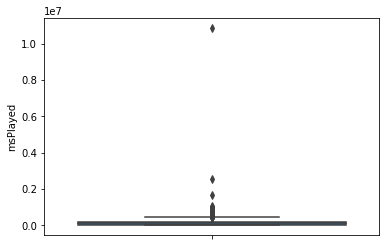

In [84]:
plt.figure(figsize=(12, 6))
plt.scatter(sptf['msPlayed'], sptf['msPlayed'])
plt.xlabel('msPlayed')
print('scatter:')
plt.show()

sns.boxplot(y=sptf['msPlayed'])
print('boxplot:')
plt.show()

Verificando os gráficos, podemos notar uma coisa estranha. Existe um valor extremamente distante de todos os outros, um outlier. Porem como são os meus dados do Spotify, me questionei "Será que tem uma música muito a mais que todas as outras?". Foi aí que fui investigar, e descobri que havia realmente escutado toda essa quantia de horas.
### Mas esses outliers não vão desbalancear toda a minha análise? 

![img](https://i.pinimg.com/originals/f1/85/3a/f1853a77c203e8bb4e6615ae7b62d325.gif)

De certa forma sim, porem às vezes as informações que precisamos estão nesses outliers, e é o nosso caso.

Outra coisa que percebi, é que os dados que o spotify disponibilizou não estão 100% corretos. Pude ver músicas que já ouvido muitas vezes com o msPlayed ZERADO!

Vacilou heim Spotfy...

Mas tudo bem, deixamos passar dessa vez :D

# Limpeza de Dados

Agora que entendemo os dados que iremos trabalhar, muitas vezes nos deparamos com informações inconsistentes. Então devemos executar uma série de limpeza ou alteração dessas informações.

- Para verificar as linas com NaN use:

Caso tenhamos valores valorem omissos como None, numpy.NaN, ou até mesmo Vazio, conseguimos identificá-los através do comando _notna()_, onde nos retorna a própria tabela, porem com os valores boleanos, representando se há ou não um valor NaN naquele índice.

- True  - Não tem NaN
- False - Tem NaN

Iremos calcular a quantia total de informações NaN, e como podemos ver, não ha nenhum valor NaN.

In [85]:
sptf.notna().value_counts()

endTime  artistName  trackName  msPlayed
True     True        True       True        27154
dtype: int64

Como não temos nenhum dado NaN, o que podemos fazer é retirar todas as músicas que tenha o msPlayed menor ou igual a 0(zero).

In [86]:
sptf = sptf.query('msPlayed > 0')

# musica com menos tempo escutado
sptf.query('msPlayed <= 10')

,endTime,artistName,trackName,msPlayed
25330,2022-03-25 22:51,Rilès,ME FALLING,10


# Agregação
Na parte de agregação, buscamos resumir os dados através de métricas e estatísticas como soma, media, etc. para extrair insigths. 
- Insigths - É a capacidade de tirar conclusões sobre os dados

O que precisaremos fazer é buscar as músicas mais ouvidas e também os artistas mais ouvidos. 

#### Abaixo observaremos os 10 artistas mais escutados.

In [87]:
artistas = sptf[['artistName','msPlayed']].groupby('artistName').agg('sum').reset_index()
artistas = artistas.sort_values(by='msPlayed' ,ascending=False)
artistas_top_10 = artistas[:10]
artistas_top_10

,artistName,msPlayed
944,Matuê,229298810
1382,The Weeknd,183780747
1154,Pineapple StormTv,162382462
723,Khalid,137251286
703,Kalli,136447279
1486,Xamã,114000607
628,Japa,98977275
1105,Orgânico,86871420
1524,Zé Neto & Cristiano,78040347
1277,Sidoka,75987826


#### Abaixo observaremos as 10 musicas mais escutadas.

In [88]:
musicas = sptf.sort_values(by='msPlayed' ,ascending=False)
musicas_top_10 = musicas[:10]
musicas_top_10

,endTime,artistName,trackName,msPlayed
2387,2021-06-06 11:39,Flow Podcast,DA CUNHA E GABRIEL MONTEIRO - Flow Podcast #386,10881579
16846,2021-10-30 03:06,Músicas Zen - Zen Music,Música para Dormir Rápido e Relaxar Profundame...,2546068
14586,2021-09-28 19:09,Pineapple StormTv,Poesia Acústica #5: Teu Popô - Remix,1696610
11377,2021-08-29 19:16,Pineapple StormTv,Poesia Acústica #6: Era uma Vez,1067825
831,2021-05-14 12:53,Grupo Menos É Mais,Pot-Pourri: Melhor Eu Ir / Ligando Os Fatos / ...,1008107
13096,2021-09-14 20:38,Luiz Lins,Saudade,1001669
12553,2021-09-09 23:08,Konai,Se o Sol Não Voltar Amanhã,961426
22495,2022-01-26 17:30,Sidoka,"QUEM É ELA, PT. I",858034
13045,2021-09-14 03:49,Burn-O,Saturno,815992
16643,2021-10-25 18:26,Antonio Vivaldi,"Stabat mater, RV 621: Stabat Mater dolorosa",810467


Vamos também criar mais uma coluna como as posição do ranking.

In [89]:
positions = ['1º','2º','3º','4º','5º','6º','7º','8º','9º','10º']

artistas_top_10['position'] = positions
musicas_top_10['position'] = positions

/tmp/ipykernel_90/2023364503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artistas_top_10['position'] = positions
/tmp/ipykernel_90/2023364503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musicas_top_10['position'] = positions


Com isso, já temos tudo que precisamos para fazer uma aplicação parecida com Spotify Wrapped.

# Visualização

Na etapa de visualização, é buscado criar gráficos que melhor representem os insights, gerados por agregação.

Para ficar um pouco mais fácil para pessoas leigas verem essas informações, iremos plotar um barplot.

,artistName,msPlayed,position
944,Matuê,229298810,1º
1382,The Weeknd,183780747,2º
1154,Pineapple StormTv,162382462,3º
723,Khalid,137251286,4º
703,Kalli,136447279,5º
1486,Xamã,114000607,6º
628,Japa,98977275,7º
1105,Orgânico,86871420,8º
1524,Zé Neto & Cristiano,78040347,9º
1277,Sidoka,75987826,10º


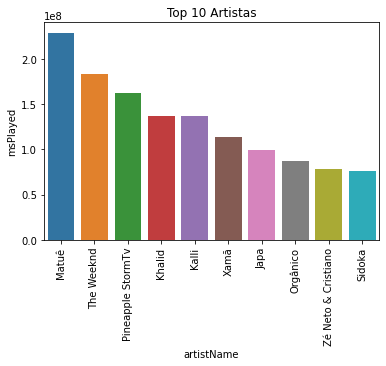

In [90]:
chart = sns.barplot(data=artistas_top_10,  x='artistName',y='msPlayed')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(title='Top 10 Artistas')
artistas_top_10

,endTime,artistName,trackName,msPlayed,position
2387,2021-06-06 11:39,Flow Podcast,DA CUNHA E GABRIEL MONTEIRO - Flow Podcast #386,10881579,1º
16846,2021-10-30 03:06,Músicas Zen - Zen Music,Música para Dormir Rápido e Relaxar Profundame...,2546068,2º
14586,2021-09-28 19:09,Pineapple StormTv,Poesia Acústica #5: Teu Popô - Remix,1696610,3º
11377,2021-08-29 19:16,Pineapple StormTv,Poesia Acústica #6: Era uma Vez,1067825,4º
831,2021-05-14 12:53,Grupo Menos É Mais,Pot-Pourri: Melhor Eu Ir / Ligando Os Fatos / ...,1008107,5º
13096,2021-09-14 20:38,Luiz Lins,Saudade,1001669,6º
12553,2021-09-09 23:08,Konai,Se o Sol Não Voltar Amanhã,961426,7º
22495,2022-01-26 17:30,Sidoka,"QUEM É ELA, PT. I",858034,8º
13045,2021-09-14 03:49,Burn-O,Saturno,815992,9º
16643,2021-10-25 18:26,Antonio Vivaldi,"Stabat mater, RV 621: Stabat Mater dolorosa",810467,10º


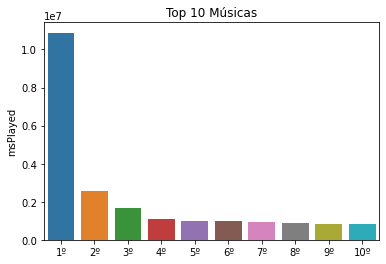

In [91]:
chart = sns.barplot(data=musicas_top_10, x=positions,y='msPlayed')
chart.set_xticklabels(chart.get_xticklabels(), size=10)
chart.set(title='Top 10 Músicas')
musicas_top_10

# Storytelling

Na etapa de storytelling, buscamos organizar as conclusões que temos dos dados, através de um formato de história, para facilitar a transmissão do conhecimento.

Baseado nos dados disponibilizados pelo Spotify, foi extraído os 10 artistas mais estucados, e as 10 musicas mais escutadas no último ano, sendo que:
- 1 Podcast
- 1 Autio Relaxante
- 8 Músicas de diversos gêneros

Nota-se que o usuário tem um gosto musical muito diversificado. Também podemos supor que o usuário possa ter alguma dificuldade para dormir, visto que a segunda música mais ouvida é relacionada ao relaxamento profundo para dormir mais facilmente. Também pode-se perceber que o usuário gosta de conhecimentos gerais, visto que escuta um Podcast com o foco na diversidade.

Portanto, recomenda-se aumentar a relação do usurário com a plataforma, recomendando novos podcast, com o formato semelhante ao que já escuta. Novos sons relaxantes para manter a qualidade do sono ainda melhor, e o anúncio de novos lançamentos do artista "Pineapple StormTv", sendo que ocupa duas posições de músicas mais ouvidas e está no Top 3 artistas mais escutados.